In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
wines = pd.read_csv('winequality.csv', sep=';')

## Início da Análise Exploratória, investigando o conteúdo dos dados

In [3]:
wines.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,1.710882,3.218501,0.531268,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,7.636088,0.160787,0.148806,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,103.898000,4.010000,2.000000,9.000000


In [5]:
wines.describe(include='object')


,type,alcohol
count,6497,6497
unique,2,112
top,White,9.5
freq,4898,367


In [6]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null object
quality                 6497 non-null int64
dtypes: float64(10), int64(1), object(2)
memory usage: 659.9+ KB


In [7]:
wines.type.unique()

array(['White', 'Red'], dtype=object)

In [8]:
wines.alcohol.value_counts().sort_index()

10                     229
10.1                   161
10.15                    3
10.2                   176
10.3                   118
10.4                   194
10.5                   227
10.55                    4
10.6                   142
10.65                    1
10.7                   123
10.75                    1
10.8                   177
10.9                   137
10.98                    1
100.333.333.333.333      3
101.333.333.333.333      2
104.666.666.666.667      2
105.333.333.333.333      1
105.666.666.666.667      1
109.333.333.333.333      2
109.666.666.666.667      3
11                     217
11.05                    2
11.1                   110
11.2                   148
11.3                   133
11.35                    1
11.4                   153
11.45                    4
                      ... 
14.2                     1
14.9                     1
8                        1
8.0                      1
8.4                      5
8.5                     10
8

Existem dados discrepantes na coluna **Alcohol**

Criada uma expressão regular para eliminar as entradas discrepantes
os valores eram do tipo: **111.111.111.111.111**

Dessa forma subsitituiu-se essas entradas por *Not A Number(NAN)* e removeu-se as observações dos dados

In [9]:
import re
pattern = r'([0-9]{3}\.){4}[0-9]{3}'

wines['alcohol'] = wines['alcohol'].replace(pattern, np.nan, regex=True)

In [10]:
wines.alcohol.value_counts().sort_index()

10       229
10.1     161
10.15      3
10.2     176
10.3     118
10.4     194
10.5     227
10.55      4
10.6     142
10.65      1
10.7     123
10.75      1
10.8     177
10.9     137
10.98      1
11       217
11.05      2
11.1     110
11.2     148
11.3     133
11.35      1
11.4     153
11.45      4
11.5     118
11.55      1
11.6      61
11.65      1
11.7      81
11.75      2
11.8      89
        ... 
13.7       7
13.8       2
13.9       3
14        12
14.05      1
14.2       1
14.9       1
8          1
8.0        1
8.4        5
8.5       10
8.6       23
8.7       80
8.8      109
8.9       95
9        215
9.05       1
9.1      167
9.2      271
9.25       1
9.3      193
9.4      332
9.5      367
9.55       4
9.6      187
9.7      159
9.75       1
9.8      214
9.9      158
9.95       1
Name: alcohol, Length: 87, dtype: int64

In [11]:
wines['alcohol'] = wines['alcohol'].astype('float64')

In [12]:
wines_clean = wines.dropna(axis=0, how='any')

In [13]:
wines_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6457 entries, 0 to 6496
Data columns (total 13 columns):
type                    6457 non-null object
fixed acidity           6457 non-null float64
volatile acidity        6457 non-null float64
citric acid             6457 non-null float64
residual sugar          6457 non-null float64
chlorides               6457 non-null float64
free sulfur dioxide     6457 non-null float64
total sulfur dioxide    6457 non-null float64
density                 6457 non-null float64
pH                      6457 non-null float64
sulphates               6457 non-null float64
alcohol                 6457 non-null float64
quality                 6457 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 706.2+ KB


In [14]:
wines_clean.shape

(6457, 13)

In [15]:
wines_clean.loc[:,'type'] = wines_clean['type'].astype('category')

/home/daniel/envs/datascience/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [16]:
wines_clean['type'].value_counts()

White    4864
Red      1593
Name: type, dtype: int64

In [17]:
wines_dum = pd.get_dummies(wines_clean, prefix_sep='_')

In [18]:
wines_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6457 entries, 0 to 6496
Data columns (total 14 columns):
fixed acidity           6457 non-null float64
volatile acidity        6457 non-null float64
citric acid             6457 non-null float64
residual sugar          6457 non-null float64
chlorides               6457 non-null float64
free sulfur dioxide     6457 non-null float64
total sulfur dioxide    6457 non-null float64
density                 6457 non-null float64
pH                      6457 non-null float64
sulphates               6457 non-null float64
alcohol                 6457 non-null float64
quality                 6457 non-null int64
type_Red                6457 non-null uint8
type_White              6457 non-null uint8
dtypes: float64(11), int64(1), uint8(2)
memory usage: 668.4 KB


Separação das variáveis independentes das variáveis depentendes

Preparação do modelo

In [19]:
wines_quality = wines_dum['quality']
wines_processed = wines_dum.drop('quality', axis=1)

Análise gráfica, através de boxplot, histogramas e gráficos de dispersão

Avaliação do modelo:
   - Análise de correlação
   - Análise de correlação
   - Seleção das características através de testes de hipóteses

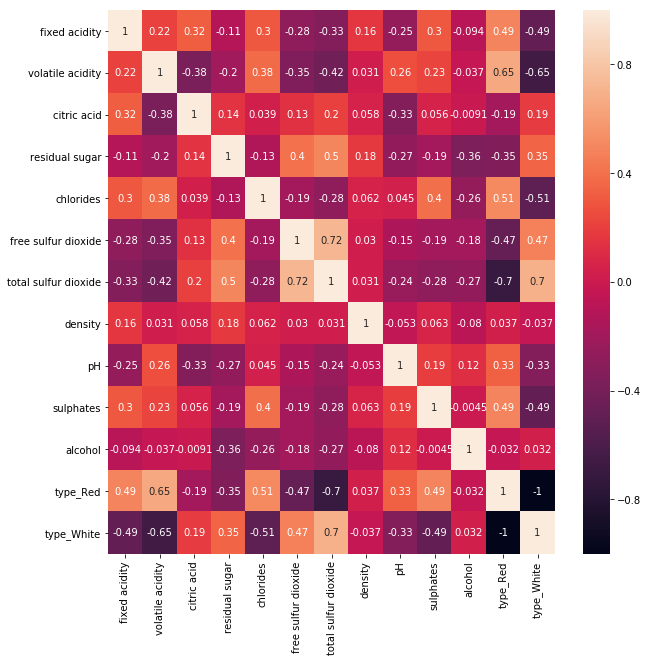

In [20]:
wines_corr = wines_processed.corr()
# fig = plt.figure()
# ax = fig.add_subplot(111)
# cax = ax.matshow(wines_corr,cmap='coolwarm', vmin=-1, vmax=1)
# fig.colorbar(cax)
# ticks = np.arange(0,len(wines_processed.columns),1)
# ax.set_xticks(ticks)
# plt.xticks(rotation=90)
# ax.set_yticks(ticks)
# ax.set_xticklabels(wines_processed.columns)
# ax.set_yticklabels(wines_processed.columns)
# plt.show()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(wines_corr, annot=True)

In [21]:
wines_corr[wines_corr >= 0.7]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_Red,type_White
fixed acidity,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
volatile acidity,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citric acid,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
residual sugar,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chlorides,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
free sulfur dioxide,NaN,NaN,NaN,NaN,NaN,1.000000,0.720979,NaN,NaN,NaN,NaN,NaN,NaN
total sulfur dioxide,NaN,NaN,NaN,NaN,NaN,0.720979,1.000000,NaN,NaN,NaN,NaN,NaN,0.700798
density,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
pH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


Seleção das variáveis melhor classificadas, considerando

Avaliação do chi2

Avaliação de características usando ExtraTreeClassifier

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


#target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(wines_processed, wines_quality)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(wines_processed.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(6,'Score'))  #print 10 best features

                Features        Score
6   total sulfur dioxide  1254.610054
5    free sulfur dioxide   916.761779
7                density   290.704245
3         residual sugar   232.191057
10               alcohol   200.443888
11              type_Red    88.581788


[0.07911516 0.0984571  0.0827928  0.08619811 0.08224376 0.08481774
 0.09288497 0.08555571 0.0790362  0.08499381 0.13675121 0.00462732
 0.00252611]


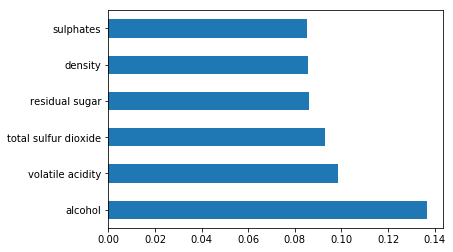

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=10)
etc.fit(wines_processed, wines_quality)
print(etc.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(etc.feature_importances_, index=wines_processed.columns)
feat_importances.nlargest(6).plot(kind='barh')

In [24]:
wines_num = wines_processed.select_dtypes(include = ['float64', 'int64'])

Considering that the variables *free sulfur dioxide* and *total sulfur dioxide* have a high correlation (greater than 0.7), I decided to keep the first one on the data. 

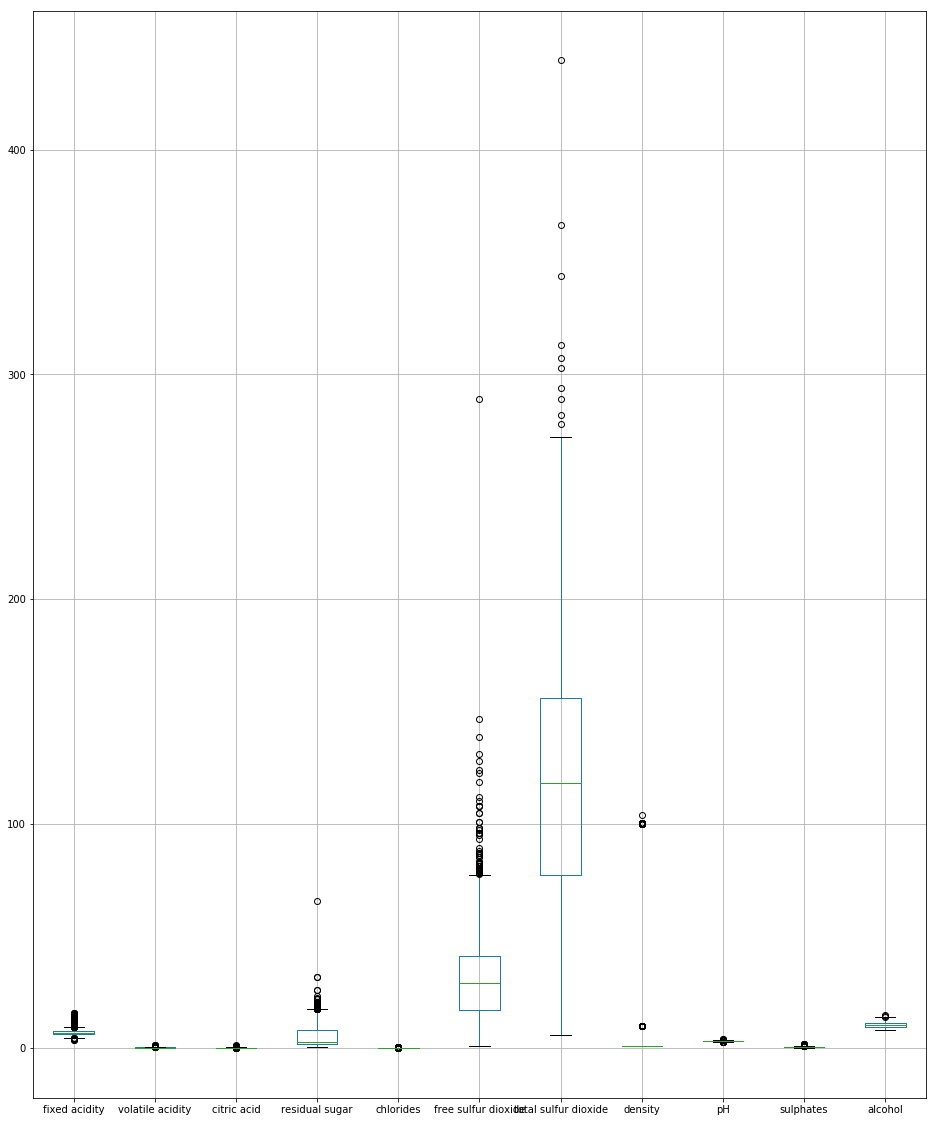

In [25]:
wines_num.boxplot(figsize=(16,20), grid=True)

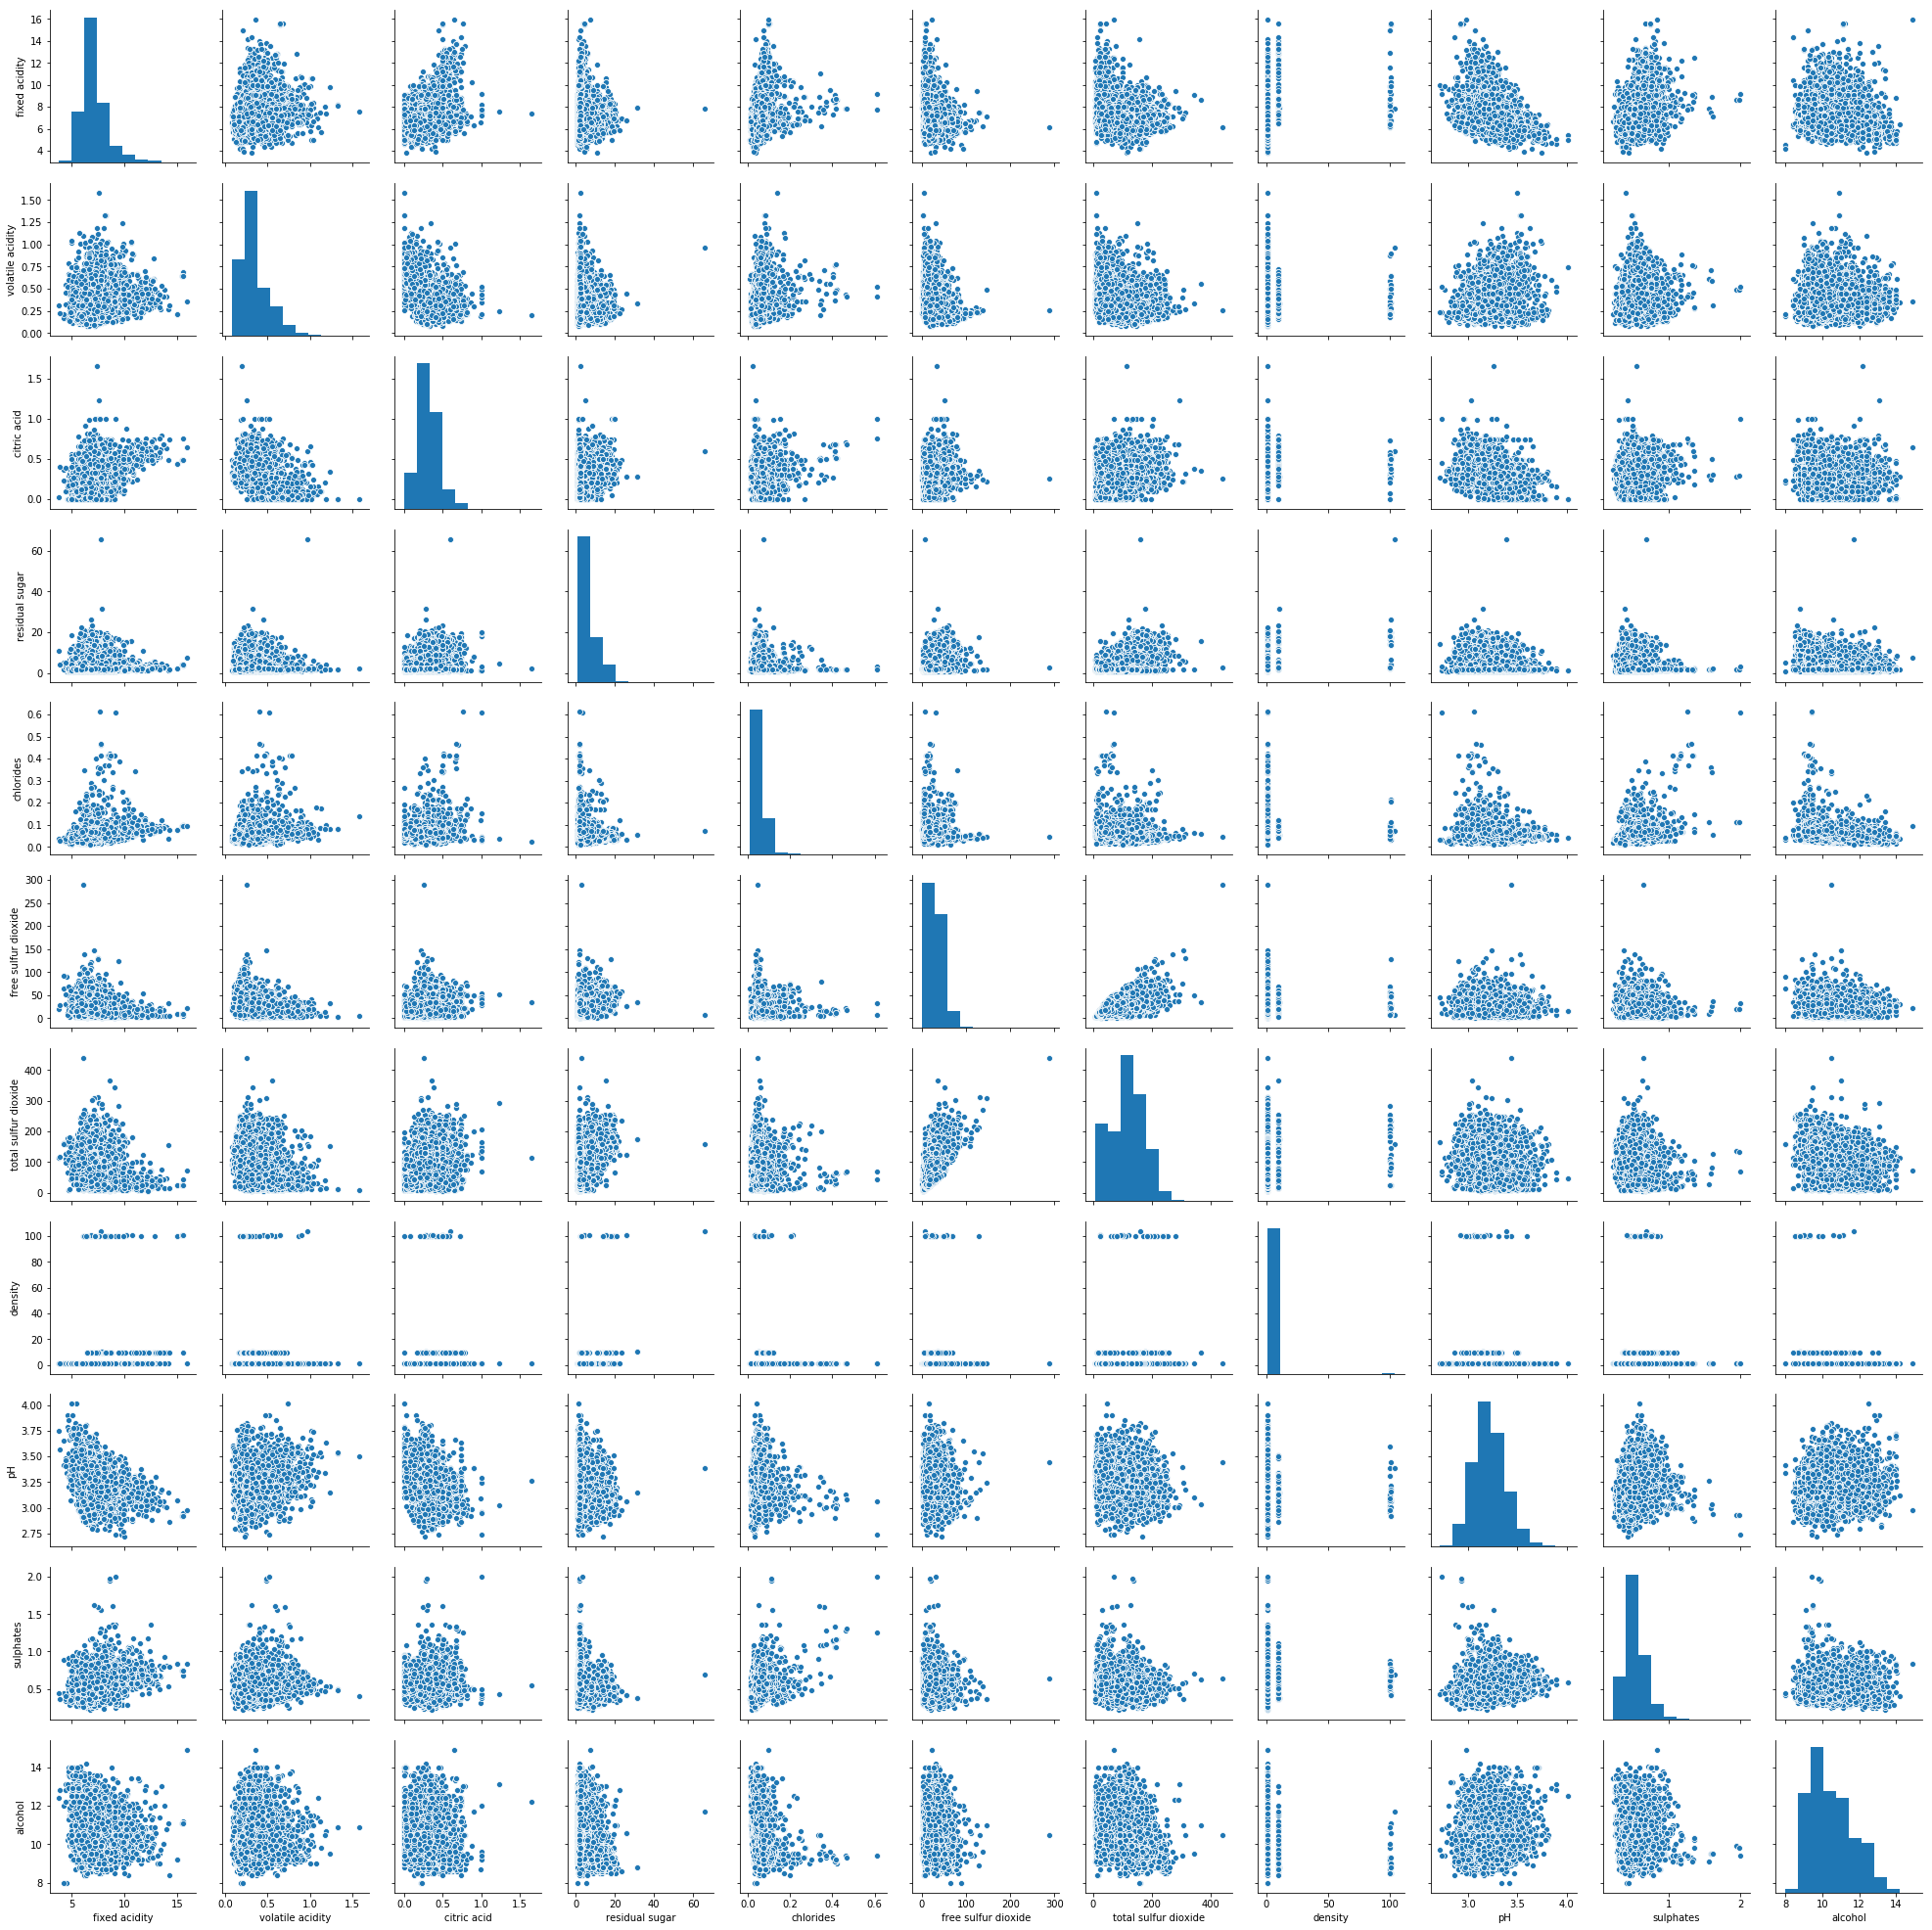

In [26]:
sns.pairplot(wines_num)

Criação de um novo conjunto de dados com as características mais relevantes segundo o método ExtraTreeClassifier

In [27]:
#wines_sel = wines_processed.loc[:,['total sulfur dioxide', 'free sulfur dioxide', 'density', 'residual sugar', 'alcohol']]
wines_sel = wines_processed.loc[:,['total sulfur dioxide', 'volatile acidity', 'sulphates', 'alcohol', 'pH']]            

In [28]:
wines_sel.describe()

,total sulfur dioxide,volatile acidity,sulphates,alcohol,pH
count,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000
mean,115.690801,0.339684,0.531169,10.489083,3.218592
std,56.595196,0.164690,0.148870,1.192961,0.160845
min,6.000000,0.080000,0.220000,8.000000,2.720000
25%,77.000000,0.230000,0.430000,9.500000,3.110000
50%,118.000000,0.290000,0.510000,10.300000,3.210000
75%,156.000000,0.400000,0.600000,11.300000,3.320000
max,440.000000,1.580000,2.000000,14.900000,4.010000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2adcdb5208>,
      dtype=object)

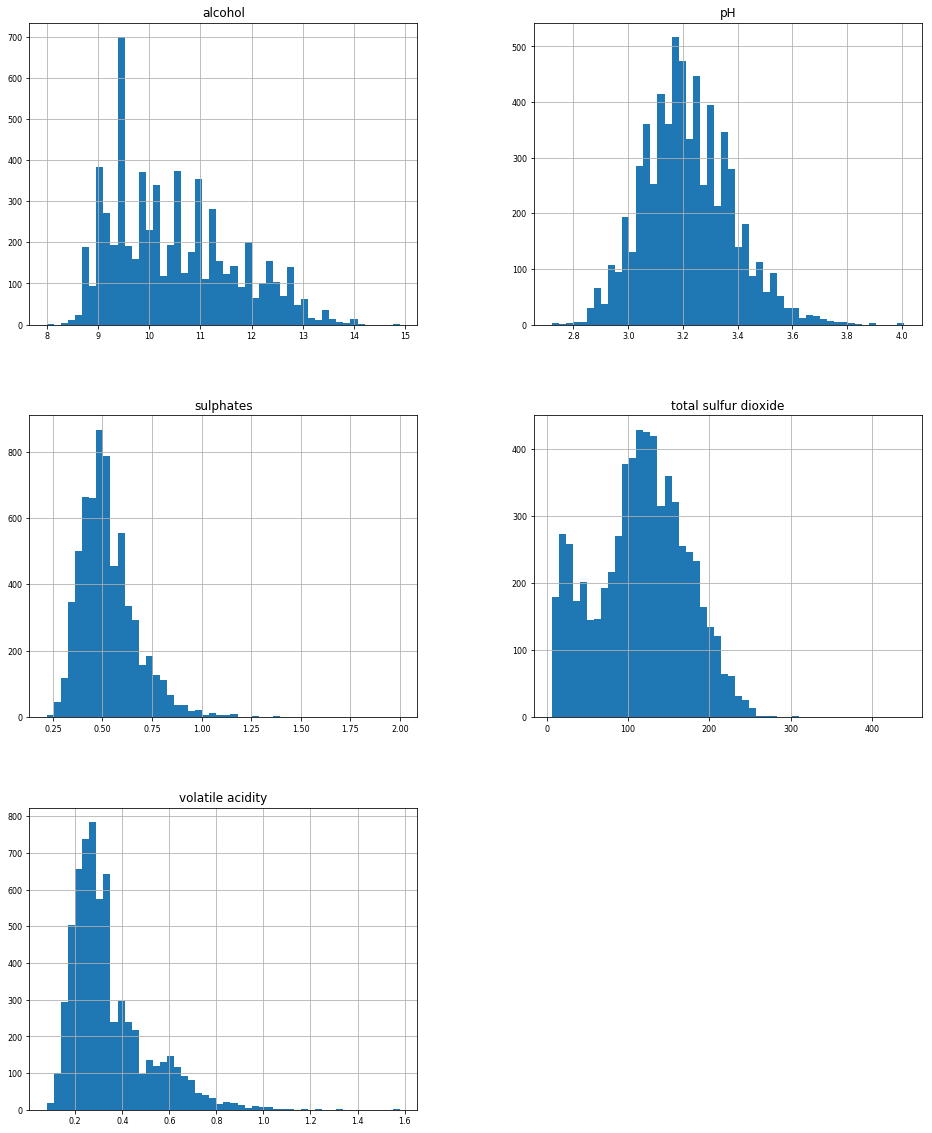

In [29]:
wines_sel.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

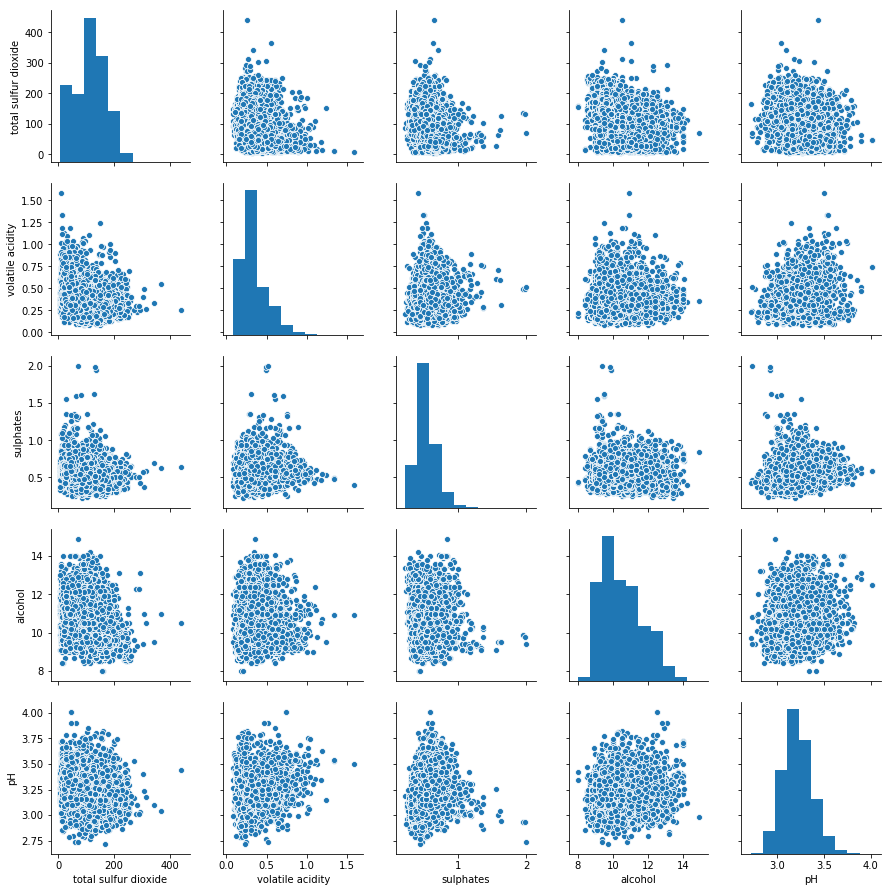

In [30]:
sns.pairplot(wines_sel)

In [31]:
# _ = pd.plotting.scatter_matrix(wines_processed, c = y, figsize= [10, 10], s=150, marker='o')
# plt.show()


In [32]:
wines_normalized = pd.DataFrame(data=None, columns=wines_sel.columns)
for feature in wines_sel:
    feat_min = wines_sel[feature].min()
    feat_max = wines_sel[feature].max()
    wines_normalized[feature] = (wines_sel[feature] - feat_min)/(feat_max - feat_min)

In [33]:
wines_normalized.head()

,total sulfur dioxide,volatile acidity,sulphates,alcohol,pH
0,0.377880,0.126667,0.129213,0.115942,0.217054
1,0.290323,0.146667,0.151685,0.217391,0.449612
2,0.209677,0.133333,0.123596,0.304348,0.418605
3,0.414747,0.100000,0.101124,0.275362,0.364341
4,0.414747,0.100000,0.101124,0.275362,0.364341


Início da fase de modelagem, treinamento e predição das categorias

Utilizando 3 classficadores:
 - Árvores de Decisão
 - K vizinhos mais próximos
 - Random Forest

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# X_train, X_holdout, y_train, y_holdout = train_test_split(wines_sel, wines_quality, train_size=0.7)
X_train, X_test, y_train, y_test = train_test_split(wines_sel, wines_quality, train_size=0.75)

/home/daniel/envs/datascience/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dtc = DecisionTreeClassifier()

In [38]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
dtc_predicted = dtc.predict(X_test)

In [40]:
dtc.score(X_test, y_test)

0.578328173374613

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn.score(X_test, y_test)

0.4996904024767802

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_predicted = rfc.predict(X_test)
rfc.score(X_test, y_test)

0.6588235294117647

In [43]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, dtc_predicted))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         6
          4       0.21      0.14      0.16        58
          5       0.64      0.64      0.64       515
          6       0.61      0.62      0.62       721
          7       0.51      0.49      0.50       264
          8       0.26      0.39      0.31        49
          9       0.00      0.00      0.00         2

avg / total       0.58      0.58      0.58      1615



In [59]:
from sklearn.svm import SVC

svc_clf = SVC()

svc_clf.fit(X_train, y_train)
svc_predicted = svc_clf.predict(X_test)
print(svc_clf.score(X_test, y_test))

0.5151702786377709


In [45]:
from sklearn.model_selection import StratifiedShuffleSplit


In [53]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

accuracy_knn = []
accuracy_rfc = []
accuracy_dtc = []
accuracy_svc_clf = []

for train_index, test_index in (sss.split(wines_normalized, wines_quality)):
    X_train, X_test = wines_normalized.iloc[train_index, :], wines_normalized.iloc[test_index, :]
    y_train, y_test = wines_quality.iloc[train_index], wines_quality.iloc[test_index]
    
    dtc.fit(X_train, y_train)
    knn.fit(X_train, y_train)
    rfc.fit(X_train, y_train)
    svc_clf.fit(X_train, y_train)
    
    dtc_predicted = dtc.predict(X_test)
    knn_predicted = knn.predict(X_test)
    rfc_predicted = rfc.predict(X_test)
    svc_clf_predicted = svc_clf.predict(X_test)
    
    accuracy_knn.append(accuracy_score(y_test, knn_predicted))
    accuracy_dtc.append(accuracy_score(y_test, dtc_predicted))
    accuracy_rfc.append(accuracy_score(y_test, rfc_predicted))
    accuracy_svc_clf.append(accuracy_score(y_test, svc_clf_predicted))
    
    
print(np.array(accuracy_knn).mean())
print(np.array(accuracy_dtc).mean())
print(np.array(accuracy_rfc).mean())
print(np.array(accuracy_svc_clf).mean())

0.5369659442724458
0.5997523219814241
0.6691021671826626
0.52


In [61]:
from sklearn.model_selection import GridSearchCV
parameters_rfc = {'n_estimators': [100, 500, 1000], 'criterion': ('gini', 'entropy'), 'max_depth': [3, 5, 7]}
clf = GridSearchCV(rfc, parameters_rfc, cv=5)
clf.fit(X_train, y_train)
rfc_gs = clf.predict(X_test)
clf.score(X_test, y_test)

/home/daniel/envs/datascience/lib/python3.5/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.561609907120743

In [48]:
# predicted = clf.predict(X_test)
# clf.score(X_test, y_test)